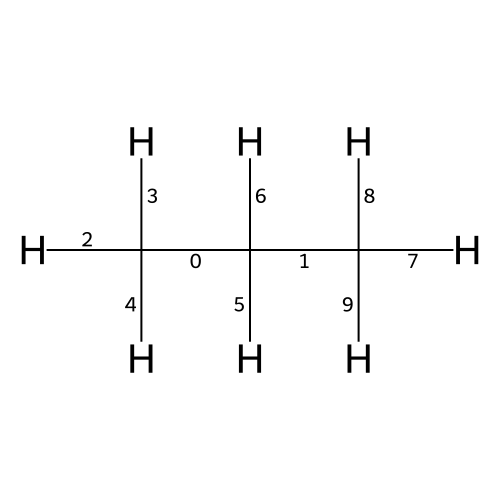

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addBondIndices = True
IPythonConsole.molSize = 500,500

smiles = r"CCC"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
mol

In [2]:
## import前只需要加入环境变量即可：
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/ai4science-chemistry/' ) 

from RRD import RRDCalculator
RRDC = RRDCalculator(scale=True)

Computation device: cpu



2022-05-24 12:02:43.851703: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-24 12:02:43.851724: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wu
2022-05-24 12:02:43.851727: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wu
2022-05-24 12:02:43.851792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-05-24 12:02:43.851809: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-05-24 12:02:43.851928: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, reb

# 单个计算

In [3]:
dfa, dfb = RRDC.transform(smiles) ## atom and bond features

In [4]:
dfa

PC        FN        FE       NSC        GC        MR      APol  \
AtomIdx                                                                         
0        0.329121  0.205732  0.215768  0.634038  0.543116  0.178531  0.119785   
1        0.368397  0.208627  0.211112  0.632164  0.547651  0.178531  0.119785   
2        0.329121  0.205732  0.215768  0.634038  0.543116  0.178531  0.119785   
3        0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   
4        0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   
5        0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   
6        0.429255  0.233265  0.254574  0.474885  0.606080  0.075392  0.010932   
7        0.429255  0.233265  0.254574  0.474885  0.606080  0.075392  0.010932   
8        0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   
9        0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   
10       0.430393  0.175945  0.242508  0.475004  0.603977  0.075392  0.010932   

              SHI      TSEI       PBV       PSV  
AtomIdx                                          
0        0.169843  0.399595  0.395463  0.162303  
1        0.212078  0.460438  0.480112  0.198941  
2        0.169843  0.149643  0.395463  0.162303  
3        0.214501  0.000000  0.326143  0.157167  
4        0.214501  0.000000  0.326143  0.157167  
5        0.203784  0.000000  0.326143  0.157167  
6        0.230402  0.000000  0.379426  0.222818  
7        0.230402  0.000000  0.379426  0.222818  
8        0.214501  0.000000  0.326143  0.157167  
9        0.203784  0.000000  0.326143  0.157167  
10       0.214501  0.000000  0.326143  0.157167

In [5]:
dfb

SB   DB   TB   AB   CB   RB   SN   SA   SS   SR        BO        BL  \
BondIdx                                                                         
0        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.209400  0.427885   
1        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.209438  0.427832   
2        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   
3        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   
4        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   
5        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.165201  0.102334   
6        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.165201  0.102334   
7        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   
8        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   
9        1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.172765  0.099385   

              BDE      BDFE  
BondIdx                      
0        0.326613  0.306577  
1        0.326613  0.306577  
2        0.394351  0.395220  
3        0.394351  0.395220  
4        0.394351  0.395220  
5        0.372077  0.372929  
6        0.372077  0.372929  
7        0.394351  0.395220  
8        0.394351  0.395220  
9        0.394351  0.395220

# 批量计算

In [6]:
smiles_list = [smiles for i in range(20)]
res = RRDC.batch_transform(smiles_list, n_jobs=-1)

100%|#######################################################################################################################################| 20/20 [00:00<00:00, 1361.83it/s]
2022-05-24 12:02:49.724899: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-24 12:02:49.724956: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wu
2022-05-24 12:02:49.724962: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wu
2022-05-24 12:02:49.725186: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2022-05-24 12:02:49.725225: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-05-24 12:02:49.725620: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimiz